In [10]:
import numpy as np
from tifffile import imread
from scipy.io import savemat

tif_file_path = "input_file.tif"  # Replace with your .tif file path
tif_data = imread(tif_file_path)

# Step 2: Prepare the data for saving
# Create a dictionary to store the data, using a key like 'data'
data_dict = {"data": tif_data}

# Step 3: Save as a .mat file
mat_file_path = "output_file.mat"  # Replace with your desired .mat file path
savemat(mat_file_path, data_dict)

print(f"Saved .mat file at {mat_file_path}")


Shape after filtering: (2085, 682, 224)


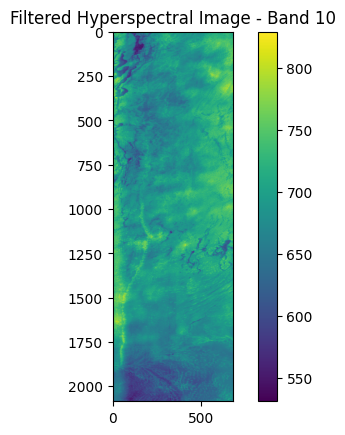

In [1]:
#Load the data

import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# Load the hyperspectral data
#change path
hyperspectral_data = scipy.io.loadmat(r"path")
#change key
hyperspectral_data = hyperspectral_data['img']  # Ensure the key is correct
height, width, bands = hyperspectral_data.shape

# Fixing the filtering issue (selecting all bands for now)
# To filter specific bands, use indexing or other criteria.
filtered_data = hyperspectral_data  # No filtering for now

print(f"Shape after filtering: {filtered_data.shape}")

# Ensure the band index is valid
band_index = 10  # Change to a valid index between 0 and bands-1
if band_index < 0 or band_index >= bands:
    raise ValueError(f"Invalid band index: {band_index}. Must be between 0 and {bands-1}.")

# Extract and display a specific band
band = filtered_data[:, :, band_index]
plt.imshow(band)
plt.colorbar()
plt.title(f'Filtered Hyperspectral Image - Band {band_index}')
plt.show()


Keys in .mat file: dict_keys(['__header__', '__version__', '__globals__', 'img', 'map'])


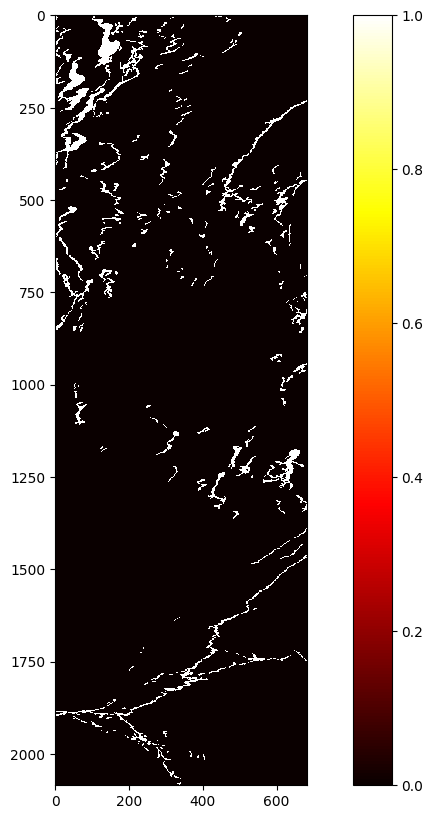

In [2]:
#Agar ground truth given ho toh
from scipy.io import loadmat

# Load the .mat file
file_path = r"C:\Users\Soham\Downloads\Hyper1.mat"  # Replace with your file path
data = loadmat(file_path)

# Inspect the keys (variables stored in the file)
print("Keys in .mat file:", data.keys())
map = data['map']
plt.figure(figsize=(12, 10))
plt.imshow(map, cmap='hot', interpolation='nearest')
plt.colorbar(label='')
#plt.title('Mean Saliency Map for Hyperspectral Data')
#plt.xlabel('Pixel X-axis')
#plt.ylabel('Pixel Y-axis')
plt.show()


Shape after filtering: (2085, 682, 224)


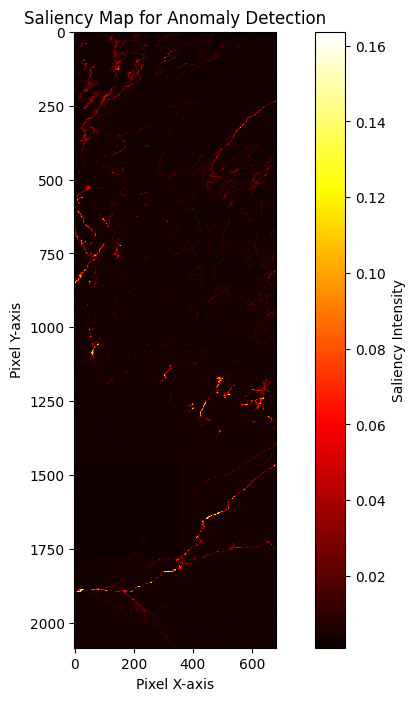

Total background vectors (DTrn): 1279769
Total anomaly vectors (DAno): 142201
Combined set (D): 1421970


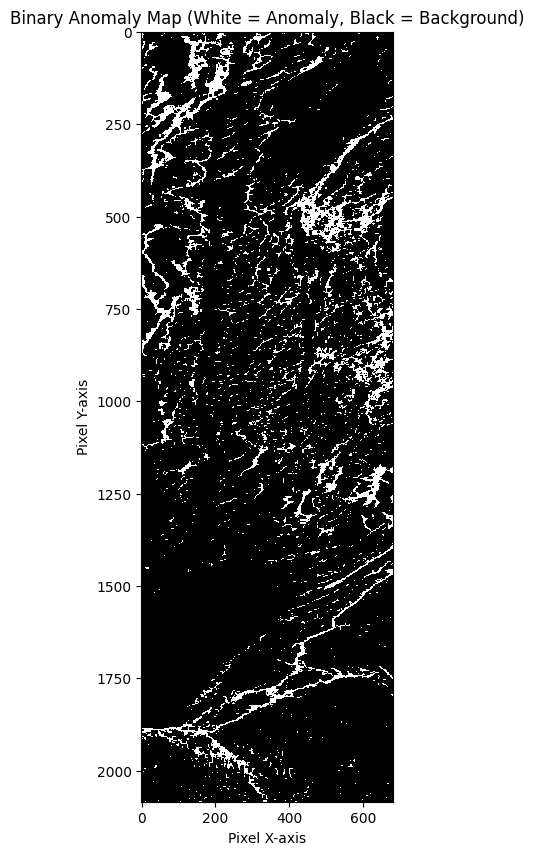

In [5]:
#Saliency map generate karo, structuring element size kam karo ta fir percebtile mei tweaks karo

import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from hyperlibrary import saliency  # Ensure this function is available

# Load the hyperspectral data
height, width, bands = filtered_data.shape
print(f"Shape after filtering: {height, width, bands}")

# Use all bands for now (apply filtering if needed)
filtered_data = filtered_data.astype(np.float32)

# Set parameters for saliency map computation
structuring_element_size = 5  # Size of the structuring element
saliency_percentile = 95  # Percentile for anomaly thresholding

# Compute saliency map and anomalies
DTrn, DAno, mean_saliency_map = saliency(
    filtered_data=filtered_data,
    structuring_element_size=structuring_element_size,
    saliency_percentile=saliency_percentile
)

# Compute the anomaly threshold based on the saliency percentile
threshold = np.percentile(mean_saliency_map, saliency_percentile)

# Create a binary mask: anomalies (white) and background (black)
binary_anomaly_map = (mean_saliency_map >= threshold).astype(int)

# Plot the Binary Anomaly Map
plt.figure(figsize=(12, 10))
plt.imshow(binary_anomaly_map, cmap='gray', interpolation='nearest')  # 'gray' colormap for black and white
plt.title('Binary Anomaly Map (White = Anomaly, Black = Background)')
plt.xlabel('Pixel X-axis')
plt.ylabel('Pixel Y-axis')
plt.show()


In [4]:
#background supression ka code hai best accuracy milega check karo konsa MIN OBJECT SIZE HAI 


from skimage.morphology import remove_small_objects
import numpy as np

# Assuming 'ground_truth' and 'binary_anomaly_map' are defined earlier
# ground_truth: numpy array (H, W) - 1 for true anomalies, 0 for background
# binary_anomaly_map: numpy array (H, W) - raw anomaly map before filtering

# Initialize variables to track the best accuracy and corresponding size
best_accuracy = 0
best_min_size = 0

# Loop through min_object_size from 50 to 200
for min_object_size in range(89, 200, 1):  # Step size of 1
    # Remove small objects (suppress noise)
    filtered_anomaly_map = remove_small_objects(binary_anomaly_map.astype(bool), min_size=min_object_size)
    filtered_anomaly_map = filtered_anomaly_map.astype(int)  # Convert back to int
    
    # Calculate confusion matrix components
    TP = np.sum((filtered_anomaly_map == 1) & (map == 1))  # True Positives
    TN = np.sum((filtered_anomaly_map == 0) & (map == 0))  # True Negatives
    FP = np.sum((filtered_anomaly_map == 1) & (map == 0))  # False Positives
    FN = np.sum((filtered_anomaly_map == 0) & (map == 1))  # False Negatives

    # Compute accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    # Track the best accuracy and min_object_size
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_min_size = min_object_size

    print(f"Min Object Size: {min_object_size}, Accuracy: {accuracy:.4f}")

# Final output: best accuracy and corresponding min_object_size
print(f"\nBest Accuracy: {best_accuracy:.4f} achieved with Min Object Size: {best_min_size}")


Min Object Size: 89, Accuracy: 0.9703
Min Object Size: 90, Accuracy: 0.9703
Min Object Size: 91, Accuracy: 0.9703
Min Object Size: 92, Accuracy: 0.9704
Min Object Size: 93, Accuracy: 0.9704
Min Object Size: 94, Accuracy: 0.9704
Min Object Size: 95, Accuracy: 0.9704
Min Object Size: 96, Accuracy: 0.9704
Min Object Size: 97, Accuracy: 0.9705
Min Object Size: 98, Accuracy: 0.9705
Min Object Size: 99, Accuracy: 0.9706
Min Object Size: 100, Accuracy: 0.9706
Min Object Size: 101, Accuracy: 0.9706
Min Object Size: 102, Accuracy: 0.9706
Min Object Size: 103, Accuracy: 0.9706
Min Object Size: 104, Accuracy: 0.9706
Min Object Size: 105, Accuracy: 0.9706
Min Object Size: 106, Accuracy: 0.9706
Min Object Size: 107, Accuracy: 0.9706
Min Object Size: 108, Accuracy: 0.9706
Min Object Size: 109, Accuracy: 0.9706
Min Object Size: 110, Accuracy: 0.9706
Min Object Size: 111, Accuracy: 0.9706
Min Object Size: 112, Accuracy: 0.9706
Min Object Size: 113, Accuracy: 0.9707
Min Object Size: 114, Accuracy: 0.97

In [ ]:
#put whatever min object size is 
from skimage.morphology import remove_small_objects
import matplotlib.pyplot as plt

# Remove small white objects (noise) from the binary anomaly map
min_object_size = 130  # Set minimum size for objects to retain
filtered_anomaly_map = remove_small_objects(binary_anomaly_map.astype(bool), min_size=min_object_size)

# Convert back to integer for plotting
filtered_anomaly_map = filtered_anomaly_map.astype(int)

# Plot the cleaned Binary Anomaly Map
plt.figure(figsize=(12, 10))
plt.imshow(filtered_anomaly_map, cmap='gray', interpolation='nearest')
plt.title('Filtered Binary Anomaly Map (White = Anomaly, Black = Background)')
plt.xlabel('Pixel X-axis')
plt.ylabel('Pixel Y-axis')
plt.show()


Size Threshold: 10, Accuracy: 0.9137
Size Threshold: 20, Accuracy: 0.9164
Size Threshold: 30, Accuracy: 0.9195
Size Threshold: 40, Accuracy: 0.9223
Size Threshold: 50, Accuracy: 0.9251
Size Threshold: 60, Accuracy: 0.9269
Size Threshold: 70, Accuracy: 0.9287
Size Threshold: 80, Accuracy: 0.9297
Size Threshold: 90, Accuracy: 0.9309
Size Threshold: 100, Accuracy: 0.9320

Best Results:
Best Size Threshold: 100
Best Accuracy: 0.9320


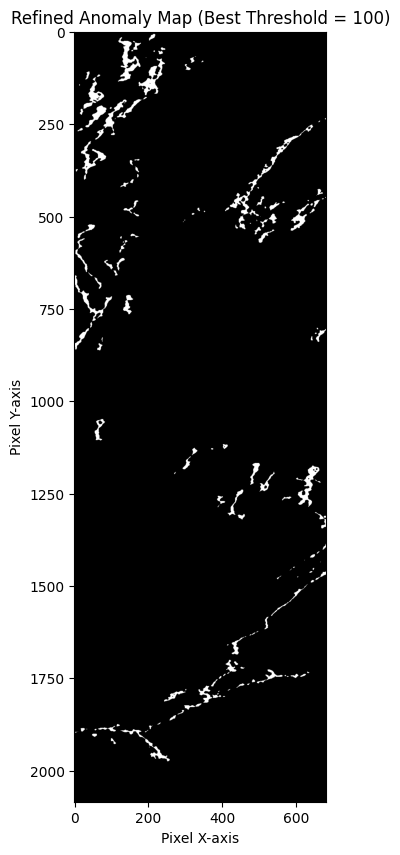

In [9]:
#ye gaussian blur wala hai,check kar agar op close hai kya koi ek use karege,sigma and threshold change karo 

import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage.morphology import remove_small_objects
from scipy.ndimage import gaussian_filter

def refine_connected_components(binary_anomaly_map, size_threshold=50):
    """
    Refines anomaly map by removing small connected components based on size threshold.
    """
    labeled_map = label(binary_anomaly_map)
    refined_map = np.zeros_like(binary_anomaly_map)

    for region in regionprops(labeled_map):
        if region.area >= size_threshold:
            for coords in region.coords:
                refined_map[coords[0], coords[1]] = 1

    return refined_map

# Assuming filtered_anomaly_map and map are defined (map = ground truth)

# Test size_thresholds from 10 to 100 in steps of 10
best_accuracy = 0
best_threshold = 0
results = {}

for size_threshold in range(10, 110, 10):
    # Step 1: Refine Anomaly Map
    refined_map = refine_connected_components(binary_anomaly_map, size_threshold=size_threshold)
    
    # Step 2: Optional Smoothing and Re-thresholding
    sigma = 2
    smoothed_map = gaussian_filter(refined_map.astype(float), sigma=sigma)
    threshold = 0.3
    final_map = (smoothed_map > threshold).astype(int)
    
    # Step 3: Compute Metrics
    TP = np.sum((final_map == 1) & (map == 1))  # True Positives
    TN = np.sum((final_map == 0) & (map == 0))  # True Negatives
    FP = np.sum((final_map == 1) & (map == 0))  # False Positives
    FN = np.sum((final_map == 0) & (map == 1))  # False Negatives

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    results[size_threshold] = accuracy

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = size_threshold

    print(f"Size Threshold: {size_threshold}, Accuracy: {accuracy:.4f}")

# Display the best results
print("\nBest Results:")
print(f"Best Size Threshold: {best_threshold}")
print(f"Best Accuracy: {best_accuracy:.4f}")

# Visualize the best anomaly map
best_refined_map = refine_connected_components(filtered_anomaly_map, size_threshold=best_threshold)
smoothed_best_map = gaussian_filter(best_refined_map.astype(float), sigma=2)
final_best_map = (smoothed_best_map > 0.5).astype(int)

plt.figure(figsize=(12, 10))
plt.imshow(final_best_map, cmap='gray')
plt.title(f'Refined Anomaly Map (Best Threshold = {best_threshold})')
plt.xlabel('Pixel X-axis')
plt.ylabel('Pixel Y-axis')
plt.show()
